In [30]:
# Test01 : 0.953356119490494

# Test02 {'grow_policy': 'lossguide', 'n_estimators': 884, 'learning_rate': 0.02094454919623795, 'gamma': 0.43310283194445315, 'subsample': 0.8241114159990148, 'colsample_bytree': 0.4604805638599247, 'max_depth': 3, 'min_child_weight': 6, 'reg_lambda': 1.588899068975288e-08, 'reg_alpha': 1.1166323197887553e-07}. Best is trial 29 with value: 0.9047921671166457.
#0.9438335704734249

#Test03 {'grow_policy': 'depthwise', 'n_estimators': 941, 'learning_rate': 0.019761611796128387, 'gamma': 0.273437747265095, 'subsample': 0.8240560571034576, 'colsample_bytree': 0.4115236844325919, 'max_depth': 3, 'min_child_weight': 2, 'reg_lambda': 4.268013260440379e-09, 'reg_alpha': 0.0002730493609398887}. Best is trial 67 with value: 0.9049037151323628.
#0.944625949274367


#Test 04 {'grow_policy': 'lossguide', 'n_estimators': 830, 'learning_rate': 0.0252981644857217, 'gamma': 0.15213729844011714, 'subsample': 0.7980519196155741, 'colsample_bytree': 0.387328824101037, 'max_depth': 3, 'min_child_weight': 7, 'reg_lambda': 3.335658178797041, 'reg_alpha': 0.0008380777803509884}. Best is trial 241 with value: 0.9050447225734267.
#0.9442574526340034

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

train = pd.read_csv("../Data/train.csv")

train = train.drop("id", axis = 1)

defect_counts = train[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]].sum(axis=1)
train = train[defect_counts==1]

train['target'] = train[["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]].apply(lambda row: row.idxmax(), axis=1)
train = train.drop(["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"],axis = 1)

label_map = {'Pastry': 0, 'Z_Scratch': 1, 'K_Scatch': 2, 'Stains': 3, 'Dirtiness': 4, 'Bumps': 5, 'Other_Faults': 6}
train['target'] = train['target'].map(label_map)

In [2]:
train['TypeOfSteel'] = train.apply(lambda row: 0 if row['TypeOfSteel_A300'] == 1 else (1 if row['TypeOfSteel_A400'] == 1 else None), axis=1)
train = train.drop(["TypeOfSteel_A300", "TypeOfSteel_A400"], axis = 1)
train.dropna(inplace=True)

In [26]:
#Test03 {'grow_policy': 'depthwise', 'n_estimators': 941, 'learning_rate': 0.019761611796128387, 'gamma': 0.273437747265095, 'subsample': 0.8240560571034576, 'colsample_bytree': 0.4115236844325919, 'max_depth': 3, 'min_child_weight': 2, 'reg_lambda': 4.268013260440379e-09, 'reg_alpha': 0.0002730493609398887}. Best is trial 67 with value: 0.9049037151323628.
#0.944625949274367

In [34]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE

X = train.drop("target", axis = 1)
y = train["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

model = XGBClassifier(
    objective='multi:softmax',
    grow_policy = 'depthwise',
    n_estimators = 941,
    learning_rate = 0.019761611796128387,
    gamma = 0.273437747265095,
    subsample = 0.8240560571034576,
    colsample_bytree = 0.4115236844325919,
    max_depth = 3,
    min_child_weight = 2,
    reg_lambda = 4.268013260440379e-09,
    reg_alpha = 0.0002730493609398887,


)

model.fit(X_train, y_train)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.4115236844325919, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.273437747265095,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints=None, learning_rate=0.019761611796128387,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=941, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [35]:
y_score = model.predict_proba(X_train)
y_score.shape

(36498, 7)

In [36]:
from sklearn.metrics import roc_auc_score

micro_roc_auc_ovr = roc_auc_score(
    y_train,
    y_score,
    multi_class="ovr",
    average="micro",
)
micro_roc_auc_ovr

0.973615914327162

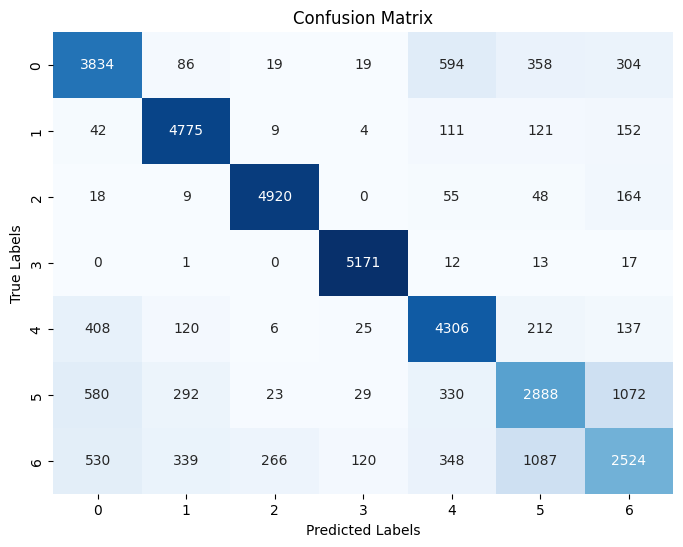

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_train)

conf_matrix = confusion_matrix(y_train, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [38]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.71      0.74      0.72      5214
           1       0.85      0.92      0.88      5214
           2       0.94      0.94      0.94      5214
           3       0.96      0.99      0.98      5214
           4       0.75      0.83      0.79      5214
           5       0.61      0.55      0.58      5214
           6       0.58      0.48      0.53      5214

    accuracy                           0.78     36498
   macro avg       0.77      0.78      0.77     36498
weighted avg       0.77      0.78      0.77     36498



In [39]:
_, X_test, _, y_test = train_test_split(X_train, y_train, test_size=0.25)

In [40]:
y_pred_test = model.predict(X_test)

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.70      0.72      0.71      1297
           1       0.86      0.92      0.89      1312
           2       0.94      0.95      0.95      1308
           3       0.96      0.99      0.98      1266
           4       0.74      0.83      0.78      1270
           5       0.60      0.54      0.57      1326
           6       0.59      0.51      0.55      1346

    accuracy                           0.78      9125
   macro avg       0.77      0.78      0.77      9125
weighted avg       0.77      0.78      0.77      9125



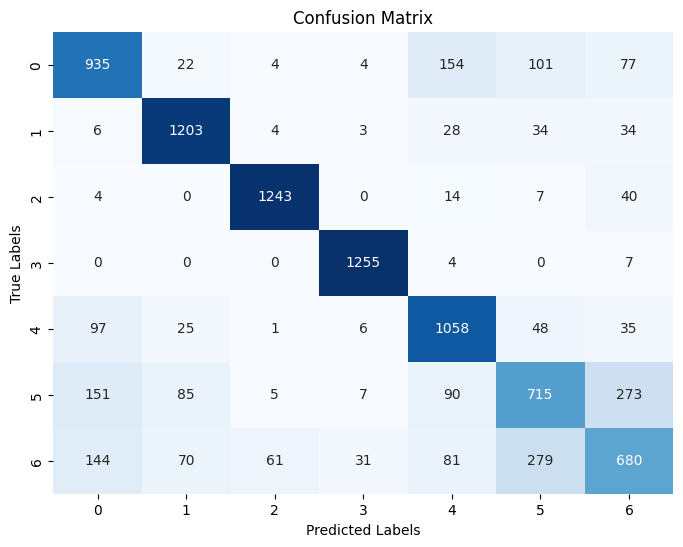

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred_test = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_test)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

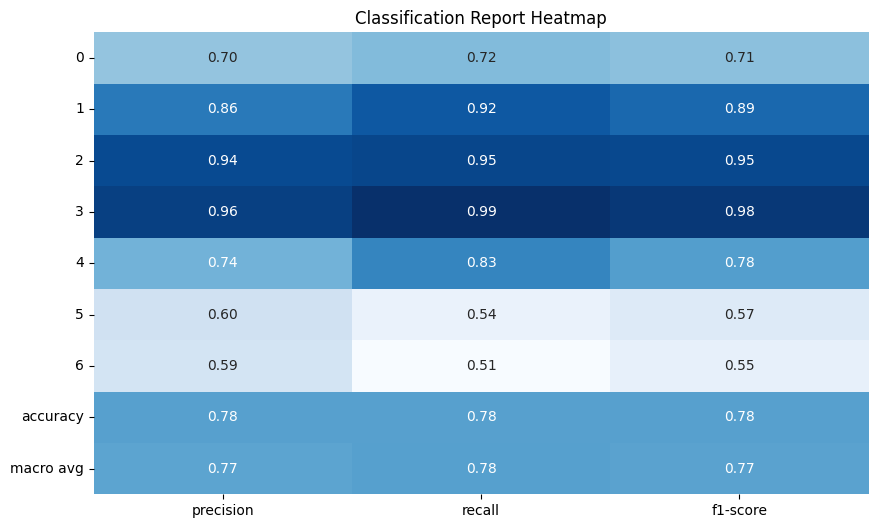

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import pandas as pd


# Generate classification report
report = classification_report(y_test, y_pred_test, output_dict=True)

# Convert the report to a Pandas DataFrame
report_df = pd.DataFrame(report).transpose()

# Define the label map
label_map = {0:'Pastry', 1:'Z_Scratch', 2:'K_Scatch', 3:'Stains', 4:'Dirtiness', 5:'Bumps', 6:'Other_Faults', 'accuracy':'Accuracy', 'macro avg':'Macro AVG', 'weighted avg': 'Weighted AVG'}
# Replace the index with the label names from the label map
report_df.index = [key for key, value in label_map.items()]

# Plot using Seaborn heatmap without color bar
plt.figure(figsize=(10, 6))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap='Blues', fmt='.2f', cbar=False)
plt.title('Classification Report Heatmap')
plt.show()


In [ ]:
label_map = {0:'Pastry', 1:'Z_Scratch', 2:'K_Scatch', 3:'Stains', 4:'Dirtiness', 5:'Bumps', 6:'Other_Faults', 'accuracy':'Accuracy', 'macro avg':'Macro AVG', 'weighted avg': 'Weighted AVG'}

In [86]:
report_df

,precision,recall,f1-score,support
0,0.699327,0.720894,0.709947,1297.000000
1,0.856228,0.916921,0.885536,1312.000000
2,0.943096,0.950306,0.946687,1308.000000
3,0.960949,0.991311,0.975894,1266.000000
4,0.740378,0.833071,0.783994,1270.000000
5,0.603885,0.539216,0.569721,1326.000000
6,0.593368,0.505201,0.545746,1346.000000
accuracy,0.776877,0.776877,0.776877,0.776877
macro avg,0.771033,0.779560,0.773932,9125.000000
weighted avg,0.769341,0.776877,0.771734,9125.000000


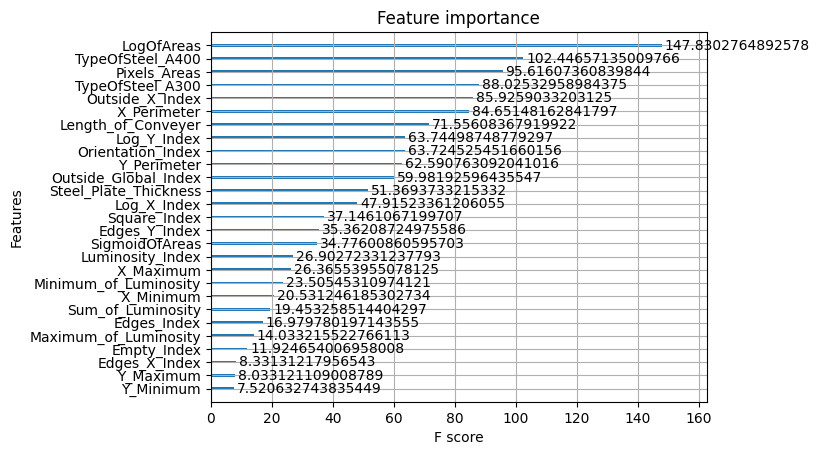

In [41]:
from xgboost import plot_importance
plot_importance(model, importance_type='gain')  # You can also use 'weight' or 'cover'
plt.show()


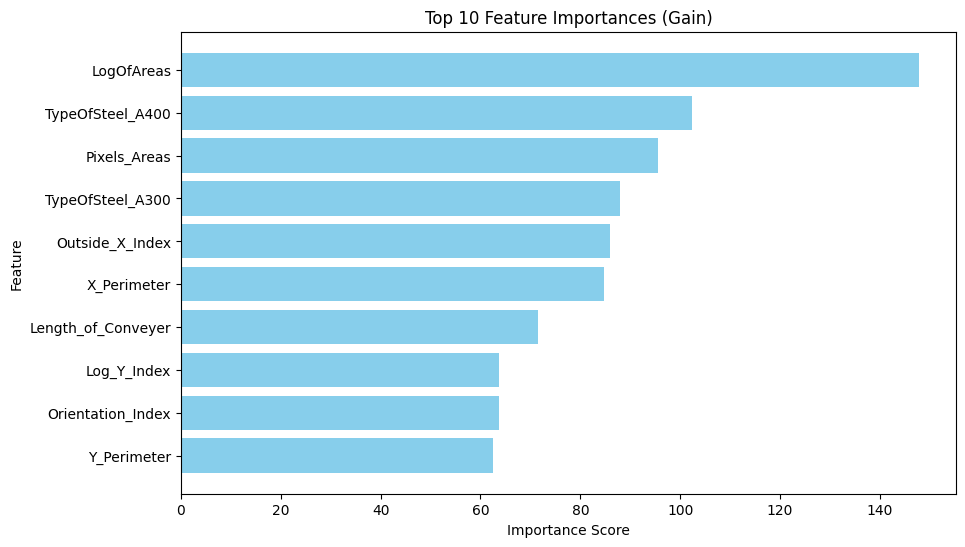

In [47]:
import matplotlib.pyplot as plt

# Plot top 10 features (or change the number based on your requirement)
top_n = 15
importance_df = importance_df.head(top_n)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.title('Top 10 Feature Importances (Gain)')
plt.gca().invert_yaxis()  # To display the highest importance at the top
plt.show()


In [48]:
importance_df

,Feature,Importance
21,LogOfAreas,147.830276
12,TypeOfSteel_A400,102.446571
4,Pixels_Areas,95.616074
11,TypeOfSteel_A300,88.025330
17,Outside_X_Index,85.925903
5,X_Perimeter,84.651482
10,Length_of_Conveyer,71.556084
23,Log_Y_Index,63.744987
24,Orientation_Index,63.724525
6,Y_Perimeter,62.590763


In [44]:
train.columns

Index(['X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum', 'Pixels_Areas',
       'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'target'],
      dtype='object')

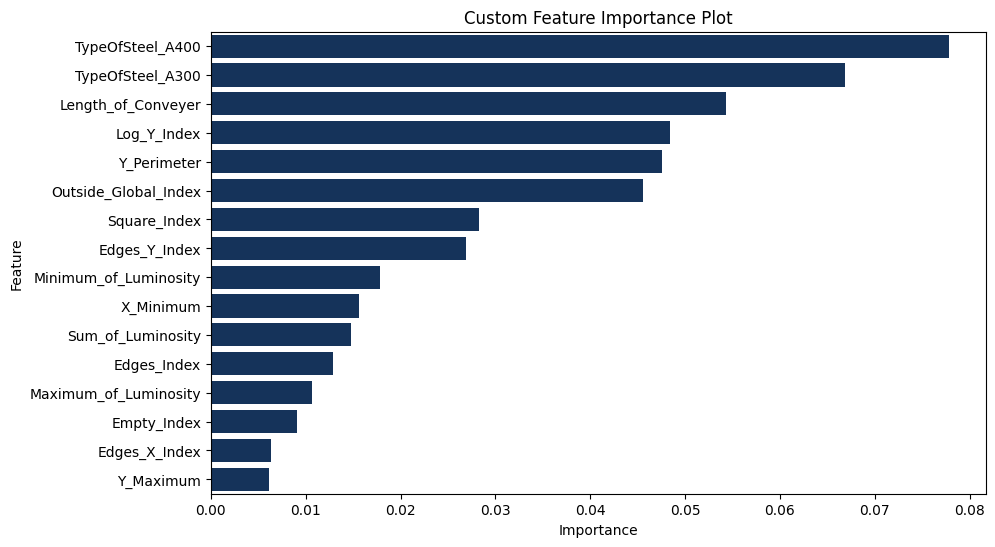

In [74]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Extract feature importances
importances = model.feature_importances_

# Create a DataFrame for the features and their importance scores
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
})
importance_df = importance_df.drop(index=[2, 4, 5, 17, 24, 21, 22, 1, 26, 25, 13 ]) 
# Sort features by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Plot using Seaborn or Matplotlib
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=importance_df, color='#0a3265')
plt.title('Custom Feature Importance Plot')
plt.show()


In [51]:
importance_df

,Feature,Importance
21,LogOfAreas,0.112312
12,TypeOfSteel_A400,0.077833
4,Pixels_Areas,0.072643
11,TypeOfSteel_A300,0.066876
17,Outside_X_Index,0.065281
5,X_Perimeter,0.064313
10,Length_of_Conveyer,0.054364
23,Log_Y_Index,0.048429
24,Orientation_Index,0.048414
6,Y_Perimeter,0.047553


In [ ]:
importance_df = importance_df.drop(index=[2, 4, 5, 17, 24, 21, 22, 1, 26, 25, 13 ]) 

In [72]:
importance_df

,Feature,Importance
21,LogOfAreas,0.112312
12,TypeOfSteel_A400,0.077833
4,Pixels_Areas,0.072643
11,TypeOfSteel_A300,0.066876
17,Outside_X_Index,0.065281
5,X_Perimeter,0.064313
10,Length_of_Conveyer,0.054364
23,Log_Y_Index,0.048429
24,Orientation_Index,0.048414
6,Y_Perimeter,0.047553


In [13]:
test = pd.read_csv("../Data/test.csv")

testid = test["id"]

test['TypeOfSteel'] = test.apply(lambda row: 0 if row['TypeOfSteel_A300'] == 1 else (1 if row['TypeOfSteel_A400'] == 1 else None), axis=1)
test = test.drop(["TypeOfSteel_A300", "TypeOfSteel_A400"], axis = 1)

test["TypeOfSteel"] = test["TypeOfSteel"].fillna(1)
testX = test.drop("id", axis = 1)

In [14]:
y_test_score = model.predict_proba(testX)

In [15]:
testPred = pd.DataFrame(y_test_score)
testPred.columns = ["Pastry","Z_Scratch","K_Scatch","Stains","Dirtiness","Bumps","Other_Faults"]
testPred

,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0.507779,0.000778,0.003111,0.000065,0.012673,0.156464,0.319131
1,0.263508,0.022675,0.009747,0.000267,0.187806,0.159907,0.356090
2,0.002424,0.052767,0.041019,0.000463,0.008643,0.347152,0.547534
3,0.156252,0.001695,0.000889,0.001452,0.016560,0.365924,0.457228
4,0.002088,0.001574,0.001051,0.003475,0.007111,0.658154,0.326546
...,...,...,...,...,...,...,...
12809,0.074453,0.127598,0.003716,0.000142,0.028202,0.278326,0.487563
12810,0.173936,0.005584,0.028092,0.011444,0.149029,0.216432,0.415483
12811,0.000344,0.000321,0.948146,0.000059,0.000272,0.000739,0.050119
12812,0.386708,0.011743,0.027301,0.000136,0.062388,0.175271,0.336454


In [16]:
ffile = testPred
ffile["id"] = testid

last_column = ffile.iloc[:, -1]
ffile = ffile.iloc[:, :-1]
ffile = pd.concat([last_column, ffile], axis=1)
ffile

,id,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,19219,0.507779,0.000778,0.003111,0.000065,0.012673,0.156464,0.319131
1,19220,0.263508,0.022675,0.009747,0.000267,0.187806,0.159907,0.356090
2,19221,0.002424,0.052767,0.041019,0.000463,0.008643,0.347152,0.547534
3,19222,0.156252,0.001695,0.000889,0.001452,0.016560,0.365924,0.457228
4,19223,0.002088,0.001574,0.001051,0.003475,0.007111,0.658154,0.326546
...,...,...,...,...,...,...,...,...
12809,32028,0.074453,0.127598,0.003716,0.000142,0.028202,0.278326,0.487563
12810,32029,0.173936,0.005584,0.028092,0.011444,0.149029,0.216432,0.415483
12811,32030,0.000344,0.000321,0.948146,0.000059,0.000272,0.000739,0.050119
12812,32031,0.386708,0.011743,0.027301,0.000136,0.062388,0.175271,0.336454


In [57]:
ffile.to_csv('../Submissions/test04.csv', index=False)

In [58]:
y_test_score

array([[5.0505906e-01, 8.3107396e-04, 3.8764994e-03, ..., 1.3610721e-02,
        1.5307473e-01, 3.2350376e-01],
       [2.6959798e-01, 2.5519172e-02, 1.4073047e-02, ..., 1.8736316e-01,
        1.6700856e-01, 3.3630502e-01],
       [2.7769974e-03, 5.3763665e-02, 4.2014886e-02, ..., 9.5471209e-03,
        3.2595557e-01, 5.6563586e-01],
       ...,
       [2.3952808e-04, 2.2324064e-04, 9.4439185e-01, ..., 2.3524466e-04,
        6.8972993e-04, 5.4189768e-02],
       [3.9839333e-01, 1.2128614e-02, 2.6744451e-02, ..., 7.6369666e-02,
        1.5993732e-01, 3.2635072e-01],
       [1.5049204e-03, 4.0658922e-03, 8.9765525e-01, ..., 5.0100207e-04,
        1.4950429e-03, 9.4715163e-02]], dtype=float32)

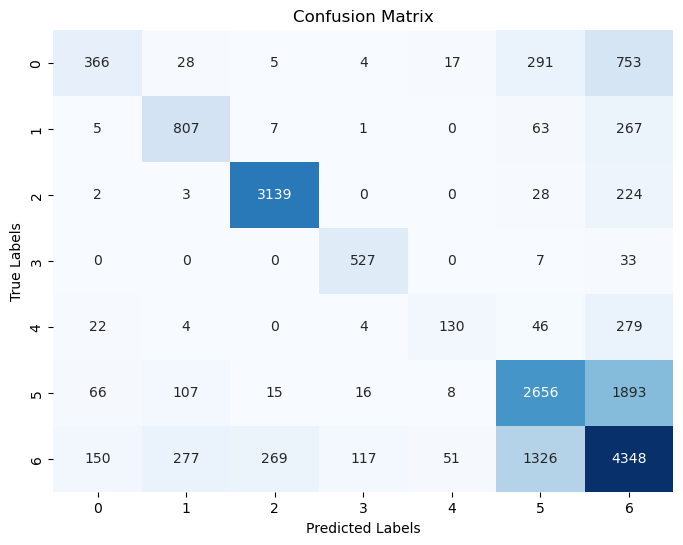

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X)

conf_matrix = confusion_matrix(y, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [5]:
from optuna.integration.dask import DaskStorage
import optuna
from dask.distributed import LocalCluster, Client
cluster = LocalCluster()
client = Client(cluster)

def objective(trial):
    params = {
        'grow_policy': trial.suggest_categorical('grow_policy', ["depthwise", "lossguide"]),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 1.0, log=True),
        'gamma' : trial.suggest_float('gamma', 1e-9, 0.5),
        'subsample': trial.suggest_float('subsample', 0.3, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.3, 1.0),
        'max_depth': trial.suggest_int('max_depth', 0, 12),
        'min_child_weight': trial.suggest_int('min_child_weight', 1, 7),
        'reg_lambda': trial.suggest_float('reg_lambda', 1e-9, 100.0, log=True),
        'reg_alpha': trial.suggest_float('reg_alpha', 1e-9, 100.0, log=True),
        
    }

    cv_scores = cross_val_score(XGBClassifier(**params), X, y, cv=5, scoring=multiroc)

    
    return cv_scores.mean()

In [ ]:
study = optuna.create_study(storage = DaskStorage())

futures = {
    client.submit(study.optimize, objective, n_traials = 1, pure = False)
    for _ in range(100)
}

client.gather(futures)
study.best_params